In [1]:
import os
import sys
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
os.chdir('/home/ch3859/comp-class/comp-lab-class/Week11/')
from psikit import Psikit

In [2]:
pk=Psikit(debug=True,threads=1,memory=12)
pk.read_from_smiles('CN1C=NC2=C1C(=O)N(C(=O)N2C)C')
pk.optimize()


  Memory set to  11.176 GiB by Python driver.
  Threads set to 1 by Python driver.
Optimizer: Optimization complete!


-676.3571175906767

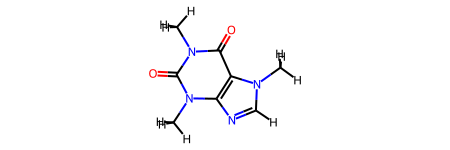

In [3]:
pk.mol

In [10]:
#caculate chages
print(pk.calc_resp_charges())
print(pk.calc_mulliken_charges())
print(pk.calc_lowdin_charges())

[-0.20126204  0.07053651  0.08506    -0.47140682  0.12577566 -0.1008334
  0.36409384 -0.49600886 -0.04595353  0.36252426 -0.52858773  0.02500921
  0.00605381 -0.03375547  0.11036604  0.11036604  0.11036604  0.17305126
  0.0500431   0.0500431   0.0500431   0.06149196  0.06149196  0.06149196]
[-0.11403965 -0.69387153  0.38640971 -0.62283951  0.63497362  0.09325907
  0.89978887 -0.63014379 -0.87904355  1.09566897 -0.62724398 -0.87749686
 -0.12040857 -0.12349383  0.12973201  0.16727757  0.16726888  0.18241275
  0.1675055   0.14895385  0.1489249   0.14560142  0.1456093   0.17519485]
[-0.13210083 -0.05233707  0.0773483  -0.27543953  0.13961214 -0.1254987
  0.29394278 -0.39450048 -0.1883033   0.34848001 -0.39857906 -0.15250977
 -0.13202198 -0.13825367  0.10404911  0.11675943  0.11778367  0.12133834
  0.11931934  0.10841293  0.10770454  0.10710541  0.10597678  0.12171161]


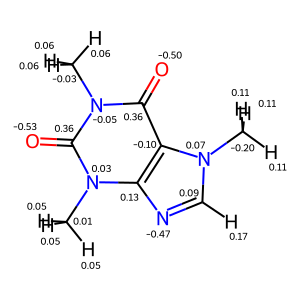

In [19]:
IPythonConsole.molSize = 300,300
mol = pk.mol
atoms = mol.GetAtoms()

for at in atoms:
    lbl = '%.2f'%(float(at.GetProp('RESP')))
    at.SetProp('atomNote',lbl)
mol

In [11]:
data = {'Symbol':[atom.GetSymbol() for atom in atoms],
        'RESP': [float(atom.GetProp('RESP')) for atom in atoms],
        'MULLIKEN': [float(atom.GetProp('MULLIKEN')) for atom in atoms],
       'LOWDIN':  [float(atom.GetProp('LOWDIN')) for atom in atoms]}

In [12]:
df = pd.DataFrame(data)

In [13]:
df.round(3)

,Symbol,RESP,MULLIKEN,LOWDIN
0,C,-0.201,-0.114,-0.132
1,N,0.071,-0.694,-0.052
2,C,0.085,0.386,0.077
3,N,-0.471,-0.623,-0.275
4,C,0.126,0.635,0.140
5,C,-0.101,0.093,-0.125
6,C,0.364,0.900,0.294
7,O,-0.496,-0.630,-0.395
8,N,-0.046,-0.879,-0.188
9,C,0.363,1.096,0.348


In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

In [17]:
plt.style.use('ggplot')

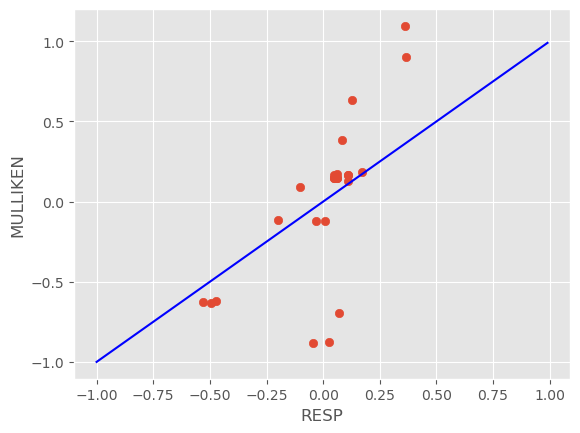

In [22]:
# RESP charge and MULLIKEN charge shows high correlation
plt.scatter(df.RESP, df.MULLIKEN)
plt.xlabel('RESP')
plt.ylabel('MULLIKEN')
plt.plot(np.arange(-1.0, 1.0, 0.01), np.arange(-1.0, 1.0, 0.01), c='b')

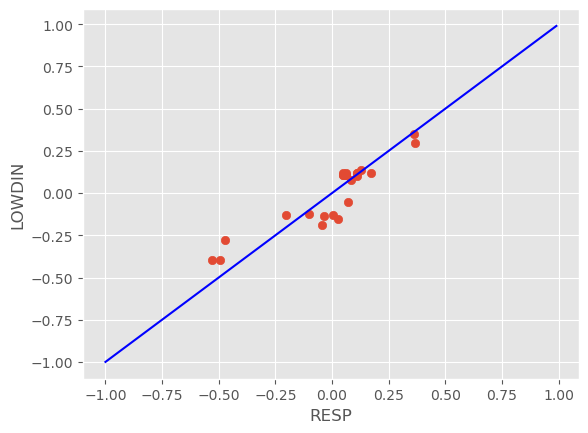

In [23]:
plt.scatter(df.RESP, df.LOWDIN)
plt.xlabel('RESP')
plt.ylabel('LOWDIN')
plt.plot(np.arange(-1.0, 1.0, 0.01), np.arange(-1.0, 1.0, 0.01), c='b')

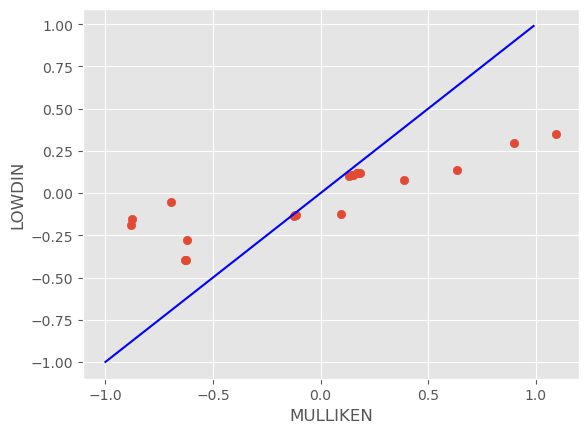

In [24]:
plt.scatter(df.MULLIKEN, df.LOWDIN)
plt.xlabel('MULLIKEN')
plt.ylabel('LOWDIN')
plt.plot(np.arange(-1.0, 1.0, 0.01), np.arange(-1.0, 1.0, 0.01), c='b')